In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Engr.NSamuel\Downloads\messy_HR_data.csv")

In [8]:
df.head(20)

,Name,Age,Salary,Gender,Department,Position,Joining Date,Performance Score,Email,Phone Number
0,grace,25,50000,Male,HR,Manager,"April 5, 2018",D,email@example.com,NaN
1,david,NaN,65000,Female,Finance,Director,2020/02/20,F,user@domain.com,123-456-7890
2,hannah,35,SIXTY THOUSAND,Female,Sales,Director,01/15/2020,C,email@example.com,098-765-4321
3,eve,NaN,50000,Female,IT,Manager,"April 5, 2018",A,name@company.org,
4,grace,NaN,NAN,Female,Finance,Manager,01/15/2020,F,name@company.org,098-765-4321
5,jack,NaN,65000,Other,Marketing,Director,03-25-2019,F,user@domain.com,NaN
6,charlie,NaN,50000,Male,Marketing,Clerk,2019.12.01,B,NaN,123-456-7890
7,grace,40,50000,Other,HR,Director,03-25-2019,C,NaN,
8,hannah,40,SIXTY THOUSAND,Female,Marketing,Manager,01/15/2020,C,user@domain.com,123-456-7890
9,eve,thirty,NAN,Other,Finance,Assistant,2020/02/20,A,NaN,


In [26]:
df.shape

(1000, 10)

In [28]:
df.info

<bound method DataFrame.info of          Name     Age          Salary  Gender Department   Position  \
0      grace       25           50000    Male         HR    Manager   
1      david      NaN           65000  Female    Finance   Director   
2     hannah       35  SIXTY THOUSAND  Female      Sales   Director   
3        eve      NaN           50000  Female         IT    Manager   
4      grace      NaN            NAN   Female    Finance    Manager   
..        ...     ...             ...     ...        ...        ...   
995     jack       50           65000  Female         HR    Manager   
996     jack   thirty           50000    Male    Finance    Analyst   
997   hannah   thirty           70000    Male         IT  Assistant   
998      bob       25           65000   Other  Marketing    Manager   
999      ivy   thirty  SIXTY THOUSAND    Male    Finance    Manager   

      Joining Date Performance Score              Email  Phone Number  
0    April 5, 2018                 D  email

In [30]:
df.dtypes

Name                 object
Age                  object
Salary               object
Gender               object
Department           object
Position             object
Joining Date         object
Performance Score    object
Email                object
Phone Number         object
dtype: object

In [32]:
df.isnull().sum().sum()

734

In [70]:
#Trim Whitespaces:
#For text fields such as Name, Department, Position, etc., remove leading and trailing spaces.

df['Name'] = df['Name'].str.strip()
df['Department'] = df['Department'].str.strip()
df['Position'] = df['Position'].str.strip()

In [72]:
#Standardize Missing Values:
#Replace placeholder strings like "NAN" (which might be in various cases or with extra spaces) with NumPy’s np.nan so that Pandas can recognize them as missing.

df.replace(to_replace=r'\s*NAN\s*', value=np.nan, regex=True, inplace=True)

In [74]:
# The Age column sometimes contains phrases (e.g., "thirty", "twenty-five"). 
#You might craft a mapping dictionary or use a natural language toolkit to convert words to numeric values
def convert_age(value):
    try:
        return float(value)
    except:
        value = value.strip().lower()
        return age_map.get(value, np.nan)

df['Age'] = df['Age'].apply(convert_age)

In [42]:

def convert_salary(value):
    try:
        return float(value)
    except:
        # Normalize by stripping and lowering the text
        value = value.strip().lower()
        return salary_map.get(value, np.nan)

df['Salary'] = df['Salary'].apply(convert_salary)

In [46]:
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

In [48]:
df['Email'] = df['Email'].str.strip()
df['Phone Number'] = df['Phone Number'].str.strip()

In [83]:
print(df['Age'].describe())

count    841.000000
mean      35.802616
std        8.551889
min       25.000000
25%       30.000000
50%       35.000000
75%       40.000000
max       50.000000
Name: Age, dtype: float64


In [85]:
print(df['Salary'].describe())

count      833.000000
mean     60216.086435
std       7127.032811
min      50000.000000
25%      55000.000000
50%      60000.000000
75%      65000.000000
max      70000.000000
Name: Salary, dtype: float64


In [81]:
print(df['Department'].value_counts())

Department
Finance      218
Sales        202
HR           200
IT           193
Marketing    187
Name: count, dtype: int64


In [56]:
print(df['Position'].value_counts())

Position
Assistant    214
Director     204
Clerk        202
Analyst      194
Manager      186
Name: count, dtype: int64


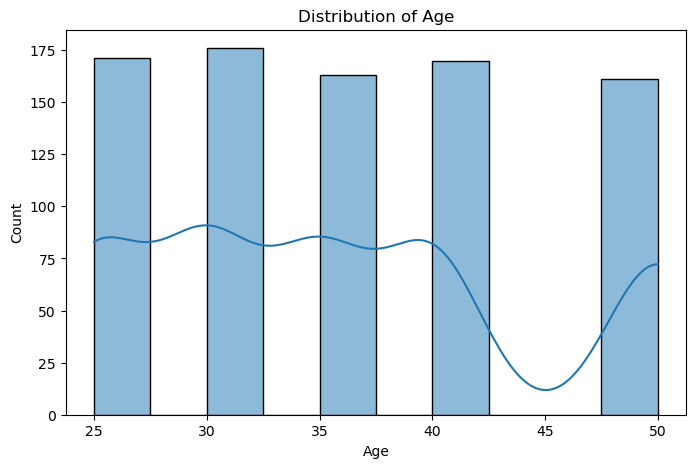

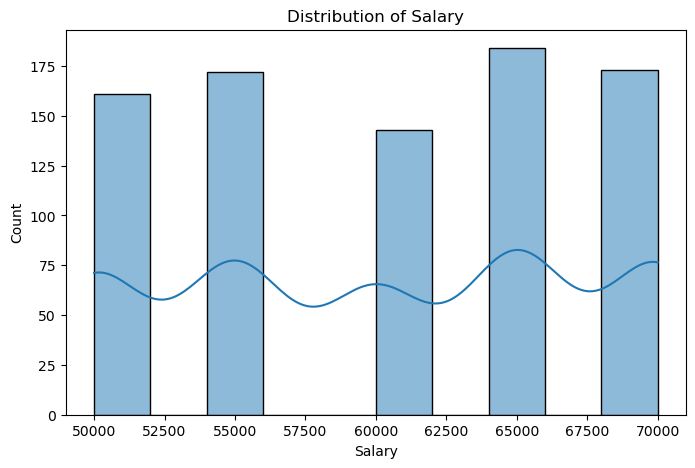

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=10, kde=True)
plt.title("Distribution of Age")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'].dropna(), bins=10, kde=True)
plt.title("Distribution of Salary")
plt.show()

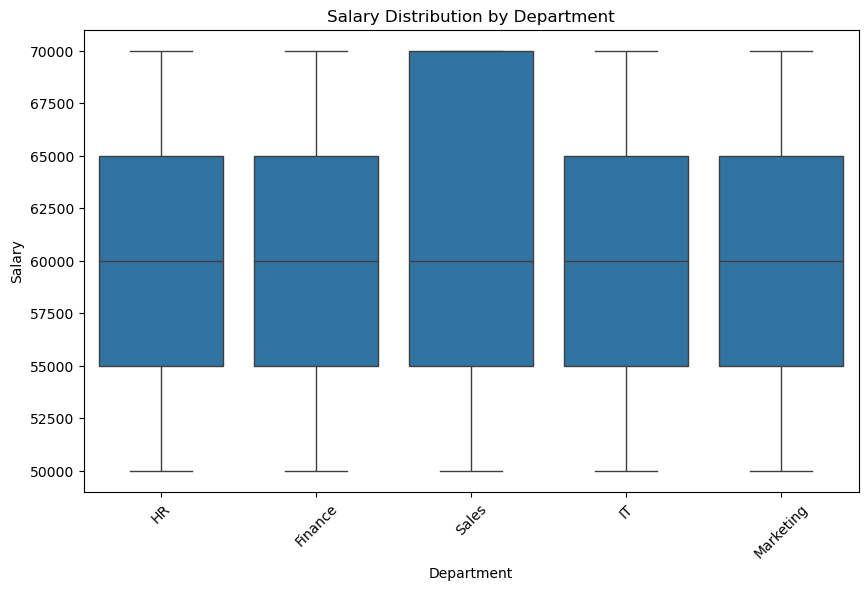

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Department")
plt.show()

Gender
Male      355
Other     332
Female    313
Name: count, dtype: int64


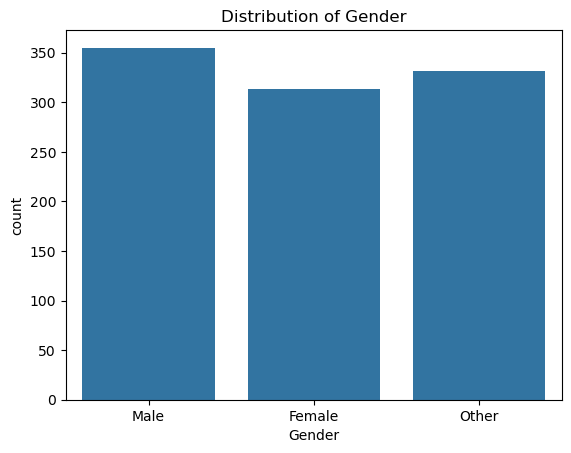

In [62]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

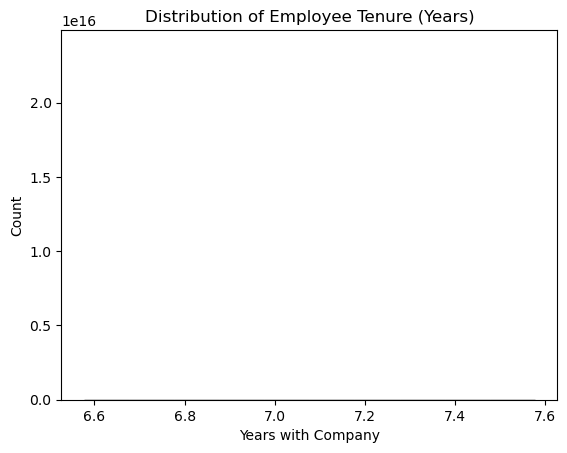

In [64]:
from datetime import datetime
current_date = datetime.now()
df['Tenure'] = (current_date - df['Joining Date']).dt.days / 365  # converting to years
sns.histplot(df['Tenure'].dropna(), bins=10, kde=True)
plt.title("Distribution of Employee Tenure (Years)")
plt.xlabel("Years with Company")
plt.show()

Department
Sales        61011.904762
HR           60261.627907
Marketing    60065.359477
Finance      59971.590909
IT           59756.097561
Name: Salary, dtype: float64


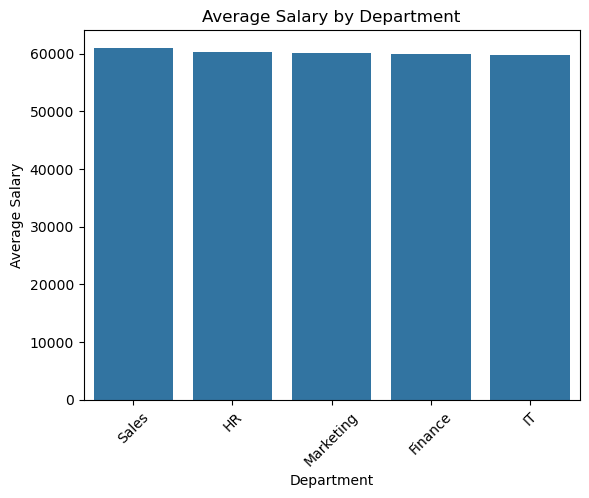

In [66]:
dept_salary = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print(dept_salary)
sns.barplot(x=dept_salary.index, y=dept_salary.values)
plt.title("Average Salary by Department")
plt.xticks(rotation=45)
plt.ylabel("Average Salary")
plt.show()

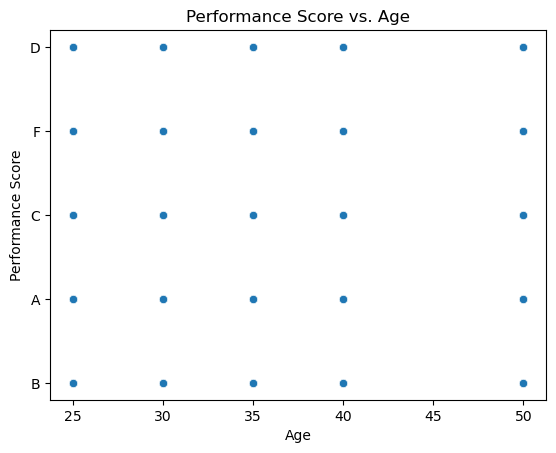

In [68]:
sns.scatterplot(x='Age', y='Performance Score', data=df)
plt.title("Performance Score vs. Age")
plt.show()

Observations and Insights
after performing the above cleaning and EDA steps, you might note the following:
- Inconsistent Numerical Data:
With age and salary now converted to numbers, you can see the true central tendency (mean, median) and spread (standard deviation) of employee demographics and compensation.
- Departmental Trends:
Some departments (for example, Finance or IT) may have higher average salaries than others, leading to insights about budgeting and compensation strategies.
- Tenure Insights:
The tenure distribution can reveal if there was a hiring surge in recent years. This may be useful in planning training programs or retention strategies.
- Performance Patterns:
Even though performance scores are categorical, their distribution can inform you about overall employee performance. You may consider recoding these categories into ordinal values for quantitative analysis.
- Data Quality Issues:
The analysis also highlights the extent of missing or inconsistent contact data (e.g., Email and Phone Number fields). Reporting the percentage of missing entries in these columns could guide data quality initiatives.



